In [2]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import numpy as np
import pandas as pd
import torch, re
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

# from asep.model.utils import generate_random_seed, seed_everything


In [3]:
sequence_examples = "PRTEINO"
sequence_examples = [sequence_examples]
# replace all rare/ambiguous amino acids by X and introduce white-space between all amino acids
sequence_examples = [" ".join(list(re.sub(r"[UZOB]", "X", sequence))) for sequence in sequence_examples]

sequence_examples[0]

'P R T E I N X'

In [5]:
proj_dir = "/Users/mansoor/Documents/GSU/Projects/Antibody-Design/epitope-prediction/"
dataset_dir = os.path.join(proj_dir, "data/")
figures = os.path.join(proj_dir, "figures/")

asep_data_dir = os.path.join(dataset_dir, "asep/")
graphs_asep_path = asep_data_dir + "asepv1_interim_graphs/"
structures_asep_path = asep_data_dir + "structures/"
ids_asep = os.path.join(asep_data_dir, "asepv1-AbDb-IDs.txt")

iedb_epi_file_path = dataset_dir + "iedb/epitope_full_v3.csv"
iedb_ag_file_path = dataset_dir + "iedb/antigen_full_v3.csv"

custom = torch.load(asep_data_dir + "processed/" + 'custom_emb.pt')

custom

/var/folders/kj/vbx4s2zd1v1ff2bc0p2tvy6r0000gn/T/ipykernel_34505/2950123140.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  custom = torch.load(asep_data_dir + "process

ModuleNotFoundError: No module named 'asep'

In [ ]:
proj_dir = "/Users/mansoor/Documents/GSU/Projects/Antibody-Design/epitope-prediction/"
dataset_dir = os.path.join(proj_dir, "data/")

asep_data_dir = os.path.join(dataset_dir, "asep/")
graphs_asep_path = asep_data_dir + "asepv1_interim_graphs/"
structures_asep_path = asep_data_dir + "structures/"
ids_asep = os.path.join(asep_data_dir, "asepv1-AbDb-IDs.txt")

iedb_epi_file_path = dataset_dir + "iedb/epitope_full_v3.csv"
iedb_ag_file_path = dataset_dir + "iedb/antigen_full_v3.csv"


In [ ]:
# Load the file
data = torch.load(graphs_asep_path + '1a14_0P.pt')

data
# print(data.keys())

/var/folders/kj/vbx4s2zd1v1ff2bc0p2tvy6r0000gn/T/ipykernel_32107/1856540925.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(graphs_asep_path + '1a14_0P

{'abdbid': '1a14_0P',
 'seqres': {'ab': OrderedDict([('H',
                'QVQLQQSGAELVKPGASVRMSCKASGYTFTNYNMYWVKQSPGQGLEWIGIFYPGNGDTSYNQKFKDKATLTADKSSNTAYMQLSSLTSEDSAVYYCARSGGSYRYDGGFDYWGQGTTVTV'),
               ('L',
                'DIELTQTTSSLSASLGDRVTISCRASQDISNYLNWYQQNPDGTVKLLIYYTSNLHSEVPSRFSGSGSGTDYSLTISNLEQEDIATYFCQQDFTLPFTFGGGTAA')]),
  'ag': {'N': 'RDFNNLTKGLCTINSWHIYGKDNAVRIGEDSDVLVTREPYVSCDPDECRFYALSQGTTIRGKHSNGTIHDRSQYRALISWPLSSPPTVYNSRVECIGWSSTSCHDGKTRMSICISGPNNNASAVIWYNRRPVTEINTWARNILRTQESECVCHNGVCPVVFTDGSATGPAETRIYYFKEGKILKWEPLAGTAKHIEECSCYGERAEITCTCRDNWQGSNRPVIRIDPVAMTHTSQYICSPVLTDNPRPNDPTVGKCNDPYPGNNNNGVKGFSYLDGVNTWLGRTISIASRSGYEMLKVPNALTDDKSKPTQGQTIVLNTDWSGYSGSFMDYWAEGECYRACFYVELIRGRPKEDKVWWTSNSIVSMCSSTEFLGQWDWPDGAKIEYFL'}},
 'mapping': {'ab': {'seqres2cdr': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 

In [ ]:
print(data["abdbid"], data["stats"], "\nNum of Ab residues: ", data["Nb"], "\nNum of Ag residues: ", data["Ng"])

1a14_0P {'cdr': np.int64(60), 'surf': np.int64(322), 'epitope': np.int64(20), 'epitope2surf_ratio': np.float64(0.062112)} 
Num of Ab residues:  60 
Num of Ag residues:  322


In [ ]:
data["seqres"]

{'ab': OrderedDict([('H',
               'QVQLQQSGAELVKPGASVRMSCKASGYTFTNYNMYWVKQSPGQGLEWIGIFYPGNGDTSYNQKFKDKATLTADKSSNTAYMQLSSLTSEDSAVYYCARSGGSYRYDGGFDYWGQGTTVTV'),
              ('L',
               'DIELTQTTSSLSASLGDRVTISCRASQDISNYLNWYQQNPDGTVKLLIYYTSNLHSEVPSRFSGSGSGTDYSLTISNLEQEDIATYFCQQDFTLPFTFGGGTAA')]),
 'ag': {'N': 'RDFNNLTKGLCTINSWHIYGKDNAVRIGEDSDVLVTREPYVSCDPDECRFYALSQGTTIRGKHSNGTIHDRSQYRALISWPLSSPPTVYNSRVECIGWSSTSCHDGKTRMSICISGPNNNASAVIWYNRRPVTEINTWARNILRTQESECVCHNGVCPVVFTDGSATGPAETRIYYFKEGKILKWEPLAGTAKHIEECSCYGERAEITCTCRDNWQGSNRPVIRIDPVAMTHTSQYICSPVLTDNPRPNDPTVGKCNDPYPGNNNNGVKGFSYLDGVNTWLGRTISIASRSGYEMLKVPNALTDDKSKPTQGQTIVLNTDWSGYSGSFMDYWAEGECYRACFYVELIRGRPKEDKVWWTSNSIVSMCSSTEFLGQWDWPDGAKIEYFL'}}

In [ ]:
data["edges"]

{'ab': tensor(indices=tensor([[ 0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,
                          3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,
                          5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,
                          6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,
                          7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,
                          9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10,
                         10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11,
                         11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
                         12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14,
                         14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16,
                         16, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
                         18, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20,
                      

In [ ]:
data["embedding"]

{'ab': {'igfold': tensor([[-1.0399,  0.8704, -0.8608,  ..., -0.6498, -0.8094, -1.1807],
          [-0.3633, -0.7151, -0.3709,  ...,  0.2797,  0.7048, -1.8234],
          [-1.7666,  0.6667, -1.0148,  ..., -0.1468, -0.0720,  0.7058],
          ...,
          [ 0.0961,  0.0582,  0.2877,  ..., -1.4733, -1.5955, -0.1268],
          [ 0.6668,  0.9970, -0.0531,  ..., -1.2293, -0.4893,  1.0265],
          [ 0.4168, -0.4423, -0.4230,  ..., -1.3241, -1.5058,  0.1727]]),
  'esm2': tensor([[-0.1389,  0.0946, -0.0205,  ..., -0.2107, -0.0520,  0.2371],
          [-0.2513,  0.2416,  0.3241,  ..., -0.0842, -0.0924,  0.0170],
          [-0.2048,  0.4315,  0.1440,  ..., -0.1274, -0.1466,  0.0419],
          ...,
          [ 0.0379, -0.0913,  0.2922,  ...,  0.1453, -0.1520, -0.0724],
          [-0.0126, -0.0456,  0.2564,  ..., -0.2632, -0.3195, -0.0351],
          [-0.1132, -0.0020,  0.1805,  ..., -0.4602, -0.3141, -0.0088]])},
 'ag': {'esm2': tensor([[-3.8686e-01, -3.0338e-02, -2.8695e-01,  ..., -4.8196

In [ ]:
pre_cal = torch.load(asep_data_dir + "processed/" + 'pre_cal.pt')

pre_cal

/var/folders/kj/vbx4s2zd1v1ff2bc0p2tvy6r0000gn/T/ipykernel_32107/1293563783.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pre_cal = torch.load(asep_data_dir + "process

(PairData(x_b=[104311, 480], x_g=[495555, 480], edge_index_b=[2, 658426], edge_index_g=[2, 3819138], abdbid=[1723], edge_index_bg=[2, 75239], y_b=[104311], y_g=[495555]),
 {'x_b': tensor([     0,     55,    112,  ..., 104193, 104247, 104311]),
  'x_g': tensor([     0,    171,    666,  ..., 495027, 495106, 495555]),
  'edge_index_b': tensor([     0,    352,    714,  ..., 657712, 658042, 658426]),
  'edge_index_g': tensor([      0,    1240,    4966,  ..., 3814990, 3815554, 3819138]),
  'abdbid': tensor([   0,    1,    2,  ..., 1721, 1722, 1723]),
  'edge_index_bg': tensor([    0,    43,    87,  ..., 75144, 75194, 75239]),
  'y_b': tensor([     0,     55,    112,  ..., 104193, 104247, 104311]),
  'y_g': tensor([     0,    171,    666,  ..., 495027, 495106, 495555])})

In [ ]:
one_hot = torch.load(asep_data_dir + "processed/" + 'blosum62_blosum62_emb.pt')

one_hot

/var/folders/kj/vbx4s2zd1v1ff2bc0p2tvy6r0000gn/T/ipykernel_32107/493798296.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  one_hot = torch.load(asep_data_dir + "processe

(PairData(x_b=[104311, 24], x_g=[495555, 24], edge_index_b=[2, 658426], edge_index_g=[2, 3819138], abdbid=[1723], edge_index_bg=[2, 75239], y_b=[104311], y_g=[495555]),
 {'x_b': tensor([     0,     55,    112,  ..., 104193, 104247, 104311]),
  'x_g': tensor([     0,    171,    666,  ..., 495027, 495106, 495555]),
  'edge_index_b': tensor([     0,    352,    714,  ..., 657712, 658042, 658426]),
  'edge_index_g': tensor([      0,    1240,    4966,  ..., 3814990, 3815554, 3819138]),
  'abdbid': tensor([   0,    1,    2,  ..., 1721, 1722, 1723]),
  'edge_index_bg': tensor([    0,    43,    87,  ..., 75144, 75194, 75239]),
  'y_b': tensor([     0,     55,    112,  ..., 104193, 104247, 104311]),
  'y_g': tensor([     0,    171,    666,  ..., 495027, 495106, 495555])})

## visualize the structure of a single raw .pt file

In [ ]:
# Load the file
data = torch.load(graphs_asep_path + '3v6o_1P.pt')

data
# print(data.keys())

/var/folders/kj/vbx4s2zd1v1ff2bc0p2tvy6r0000gn/T/ipykernel_32107/1751226753.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(graphs_asep_path + '3v6o_1P

{'abdbid': '3v6o_1P',
 'seqres': {'ab': OrderedDict([('H',
                'EVKLLESGPGLVAPSESLSITCTISGFSLTDDGVSWIRQPPGKGLEWLGVIWGGGSTYFNSLFKSRLSITRDNSKSQVFLEMDSLQTDDTAMYYCAKHDGHETMDYWGQGTSVTVSS'),
               ('L',
                'IVMTQSPKFMSTSIGDRVNITCKATQNVRTAVTWYQQKPGQSPQALIFLASNRHTGVPARFTGSGSGTDFTLTINNVKSEDLADYFCLQHWNYPLTFGSGTKLEIKRAD')]),
  'ag': {'a': 'VNINISCETDGYLTKMTCRWSTSTIQSLAESTLQLRYHRSSLYCSDIPSIHPISEPKDCYLQSDGFYECIFQPIFLLSGYTMWIRINHSLGSLDSPPTCVLPDSVVKPLPPSSVKAEITINIGLLKISWEKPVFPENNLQFQIRYGLSGKEVQWKMYEVYDAKSKSVSLPVPDLCAVYAVQVRCKRLDGLGYWSNWSNPAYT'}},
 'mapping': {'ab': {'seqres2cdr': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
          0, 0, 0

In [ ]:
print(data["abdbid"], data["stats"]) 
print("\nNum of Ab residues: ", data["Nb"], "\nNum of Ag residues: ", data["Ng"])

3v6o_1P {'cdr': np.int64(55), 'surf': np.int64(171), 'epitope': np.int64(16), 'epitope2surf_ratio': np.float64(0.093567)}

Num of Ab residues:  55 
Num of Ag residues:  171


In [ ]:
data["seqres"]

{'ab': OrderedDict([('H',
               'EVKLLESGPGLVAPSESLSITCTISGFSLTDDGVSWIRQPPGKGLEWLGVIWGGGSTYFNSLFKSRLSITRDNSKSQVFLEMDSLQTDDTAMYYCAKHDGHETMDYWGQGTSVTVSS'),
              ('L',
               'IVMTQSPKFMSTSIGDRVNITCKATQNVRTAVTWYQQKPGQSPQALIFLASNRHTGVPARFTGSGSGTDFTLTINNVKSEDLADYFCLQHWNYPLTFGSGTKLEIKRAD')]),
 'ag': {'a': 'VNINISCETDGYLTKMTCRWSTSTIQSLAESTLQLRYHRSSLYCSDIPSIHPISEPKDCYLQSDGFYECIFQPIFLLSGYTMWIRINHSLGSLDSPPTCVLPDSVVKPLPPSSVKAEITINIGLLKISWEKPVFPENNLQFQIRYGLSGKEVQWKMYEVYDAKSKSVSLPVPDLCAVYAVQVRCKRLDGLGYWSNWSNPAYT'}}

In [ ]:
print(len(data["seqres"]["ab"]["H"]), len(data["seqres"]["ab"]["L"]))
print("total length of Ab residues: ",  len(data["seqres"]["ab"]["H"]+data["seqres"]["ab"]["L"]))
print("total length of Ag residues: ", len(data["seqres"]["ag"]["a"]))

117 109
total length of Ab residues:  226
total length of Ag residues:  202


In [ ]:
print("Size of Ab embeddings: ", len(data["embedding"]["ab"]["igfold"]))
print("Size of Ag embeddings: ", len(data["embedding"]["ag"]["esm2"]))

## the total length of Ag and Ab sequence is higher than the residues participating in binding
## hence those residues 

Size of Ab embeddings:  226
Size of Ag embeddings:  202


In [ ]:
data["edges"]

{'ab': tensor(indices=tensor([[ 0,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,
                          3,  3,  3,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
                          6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,
                          7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,
                          9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                         11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12,
                         12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13,
                         13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15,
                         15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18,
                         18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
                         19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21,
                         21, 21, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23,
                      

## create pytorch geometric graph dataset from a processed .pt file  

In [ ]:
from asep.data.asepv1_dataset import AsEPv1Dataset, EmbeddingConfig

# one-hot encoding
config = EmbeddingConfig(node_feat_type="one_hot")
asepv1_dataset = AsEPv1Dataset(
    root="~/Documents/GSU/Projects/Antibody-Design/epitope-prediction/data",  # replace with the path to the parent folder of downloaded AsEP
    name="asep",
    embedding_config=config,
)
print("Size of the dataset: ", asepv1_dataset)
i = 0
graph_pair = asepv1_dataset[i]
print(graph_pair)
print(graph_pair.keys())

Size of the dataset:  asep(1723)
PairData(x_b=[55, 20], x_g=[171, 20], edge_index_b=[2, 352], edge_index_g=[2, 1240], abdbid='3v6o_1P', edge_index_bg=[2, 43], y_b=[55], y_g=[171])
['y_b', 'x_g', 'edge_index_b', 'x_b', 'y_g', 'abdbid', 'edge_index_g', 'edge_index_bg']


/Users/mansoor/Documents/GSU/Projects/Antibody-Design/epitope-prediction/epitope-pred/asepcode/asep/data/asepv1_dataset.py:104: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
 

In [ ]:
graph_pair.edge_index_bg
## each column represents an edge between Va and Vb


tensor([[ 5,  5,  5,  6,  6, 12, 12, 13, 14, 15, 16, 16, 18, 18, 20, 20, 21, 22,
         22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 39, 39, 39, 42, 48, 49, 49,
         49, 49, 50, 50, 51, 51, 53],
        [29, 62, 64, 29, 64, 43, 45, 45, 45, 45, 45, 46, 26, 44, 29, 31, 29, 27,
         28, 29, 43, 45, 28, 29, 30, 31, 32, 41, 31, 30, 31, 32, 32, 43, 40, 41,
         42, 43, 42, 43, 42, 43, 43]])

In [ ]:
node_labels_b = graph_pair.y_b  # antibody graph node labels (1 => interface nodes)
node_labels_g = graph_pair.y_g  # antigen  graph node labels (1 => interface nodes)
print("Id", graph_pair.abdbid)
print("Ab binding interface: ", len(node_labels_b), node_labels_b)
print("Epitope: ", len(node_labels_g), node_labels_g)
print("size of epitope:", node_labels_g.count_nonzero().item())

Id 3v6o_1P
Ab binding interface:  55 tensor([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 0])
Epitope:  171 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])
size of epitope: 16


In [ ]:
size_ab_residues = []
size_ag_residues = []
size_epitopes = []
size_edge_index_bipartite_graph = []

for i in range(len(asepv1_dataset)):
    size_ab_residues.append(len(asepv1_dataset[i].y_b))
    size_ag_residues.append(len(asepv1_dataset[i].y_g))
    size_epitopes.append(asepv1_dataset[i].y_b.count_nonzero().item())
    size_edge_index_bipartite_graph.append(asepv1_dataset[i].edge_index_bg.shape[1])



In [ ]:
mean_ab_residues = np.mean(size_ab_residues)
std_ab_residues = np.std(size_ab_residues)
mean_ag_residues = np.mean(size_ag_residues)
std_ag_residues = np.std(size_ag_residues)
mean_epitopes = np.mean(size_epitopes)
std_epitopes = np.std(size_epitopes)
mean_edge_index_bipartite_graph = np.mean(size_edge_index_bipartite_graph)
std_edge_index_bipartite_graph = np.std(size_edge_index_bipartite_graph)

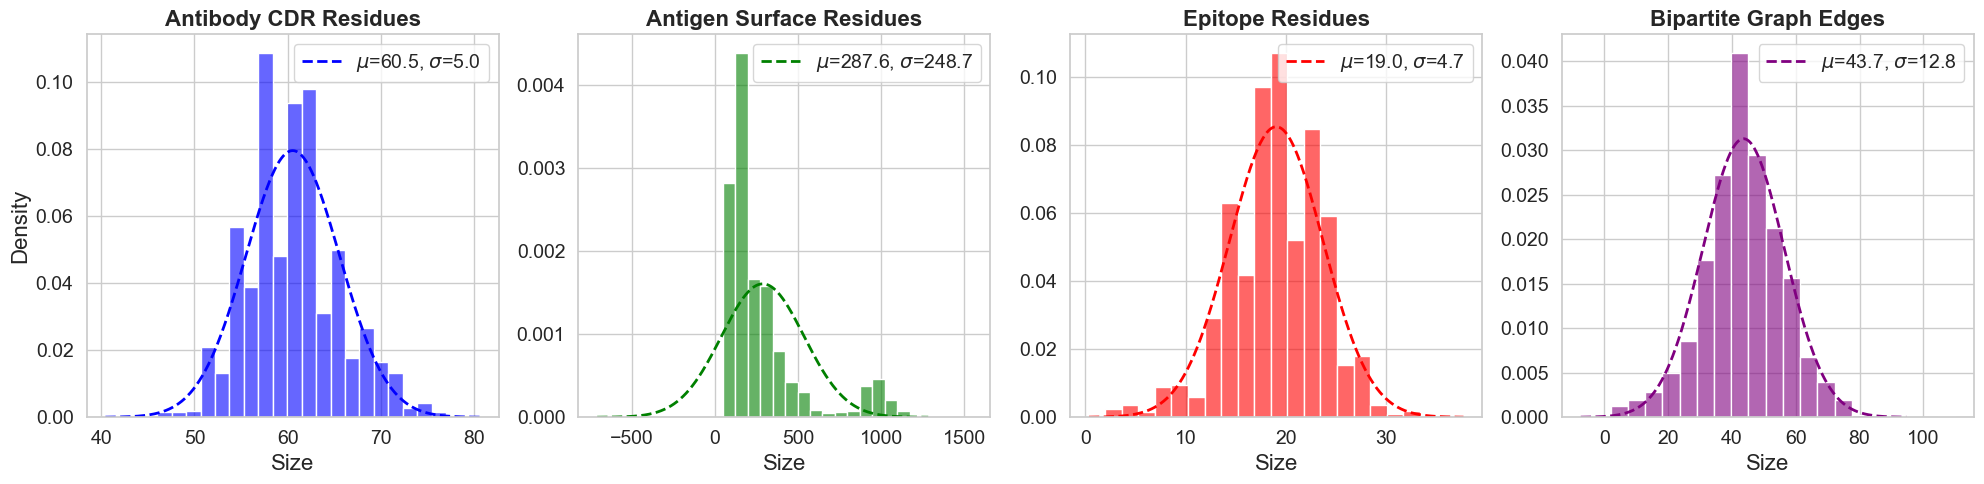

In [ ]:
# Create the plot
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot for size_ab_residues
sns.histplot(size_ab_residues, bins=20, kde=False, color='blue', alpha=0.6, ax=axes[0], stat="density")
x_ab = np.linspace(mean_ab_residues - 4*std_ab_residues, mean_ab_residues + 4*std_ab_residues, 1000)
pdf_ab = norm.pdf(x_ab, mean_ab_residues, std_ab_residues)
axes[0].plot(x_ab, pdf_ab, color='blue', linestyle='--', linewidth=2,
             label=f"$\mu$={mean_ab_residues:.1f}, $\sigma$={std_ab_residues:.1f}")
axes[0].set_title(f'Antibody CDR Residues', fontsize=16, fontweight="bold")
axes[0].set_xlabel('Size', fontsize=16)
axes[0].set_ylabel('Density', fontsize=16)
axes[0].legend(fontsize=14)
axes[0].xaxis.set_tick_params(labelsize=14)
axes[0].yaxis.set_tick_params(labelsize=14)

# Plot for size_ag_residues
sns.histplot(size_ag_residues, bins=20, kde=False, color='green', alpha=0.6, ax=axes[1], stat="density")
x_ag = np.linspace(mean_ag_residues - 4*std_ag_residues, mean_ag_residues + 4*std_ag_residues, 1000)
pdf_ag = norm.pdf(x_ag, mean_ag_residues, std_ag_residues)
axes[1].plot(x_ag, pdf_ag, color='green', linestyle='--', linewidth=2,
             label=f"$\mu$={mean_ag_residues:.1f}, $\sigma$={std_ag_residues:.1f}")
axes[1].set_title(f'Antigen Surface Residues',fontsize=16, fontweight="bold")
axes[1].set_xlabel('Size', fontsize=16)
axes[1].set_ylabel('')
axes[1].legend(fontsize=14)
axes[1].xaxis.set_tick_params(labelsize=14)
axes[1].yaxis.set_tick_params(labelsize=14)

# Plot for size_epitopes
sns.histplot(size_epitopes, bins=20, kde=False, color='red', alpha=0.6, ax=axes[2], stat="density")
x_epitopes = np.linspace(mean_epitopes - 4*std_epitopes, mean_epitopes + 4*std_epitopes, 1000)
pdf_epitopes = norm.pdf(x_epitopes, mean_epitopes, std_epitopes)
axes[2].plot(x_epitopes, pdf_epitopes, color='red', linestyle='--', linewidth=2,
             label=f"$\mu$={mean_epitopes:.1f}, $\sigma$={std_epitopes:.1f}")
axes[2].set_title(f'Epitope Residues', fontsize=16, fontweight="bold")
axes[2].set_xlabel('Size', fontsize=16)
axes[2].set_ylabel('')
axes[2].legend(fontsize=14)
axes[2].xaxis.set_tick_params(labelsize=14)
axes[2].yaxis.set_tick_params(labelsize=14)

# Plot for size_edge_index_bipartite_graph
sns.histplot(size_edge_index_bipartite_graph, bins=20, kde=False, color='purple', alpha=0.6, ax=axes[3], stat="density")
x_edge = np.linspace(mean_edge_index_bipartite_graph - 4*std_edge_index_bipartite_graph, mean_edge_index_bipartite_graph + 4*std_edge_index_bipartite_graph, 1000)
pdf_edge = norm.pdf(x_edge, mean_edge_index_bipartite_graph, std_edge_index_bipartite_graph)
axes[3].plot(x_edge, pdf_edge, color='purple', linestyle='--', linewidth=2,
             label=f"$\mu$={mean_edge_index_bipartite_graph:.1f}, $\sigma$={std_edge_index_bipartite_graph:.1f}")
axes[3].set_title(f'Bipartite Graph Edges', fontsize=16, fontweight="bold")
axes[3].set_xlabel('Size', fontsize=16)
axes[3].set_ylabel('')
axes[3].legend(fontsize=14)
axes[3].xaxis.set_tick_params(labelsize=14)
axes[3].yaxis.set_tick_params(labelsize=14)


# Adjust layout
plt.tight_layout()
plt.savefig(figures+"ab_ag_residue_density_plots.png")
# Show the plot
plt.show()

In [ ]:
# pre-calculated embeddings with AntiBERTy (via igfold) and ESM2
config = EmbeddingConfig(
    node_feat_type='pre_cal',
    ab={"embedding_model": "igfold"},  # change this "esm2" for ESM2 embeddings
    ag={"embedding_model": "esm2"},
)
asepv1_dataset = AsEPv1Dataset(
    root="~/Documents/GSU/Projects/Antibody-Design/epitope-prediction/data",  # replace with the path to the parent folder of downloaded AsEP
    name="asep",
    embedding_config=config,
)

# get i-th graph pair and node labels
i = 0
graph_pair = asepv1_dataset[i]
print(graph_pair)
print(graph_pair.keys())

/Users/mansoor/Documents/GSU/Projects/Antibody-Design/epitope-prediction/epitope-pred/asepcode/asep/data/asepv1_dataset.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
 

PairData(x_b=[55, 480], x_g=[171, 480], edge_index_b=[2, 352], edge_index_g=[2, 1240], abdbid='3v6o_1P', edge_index_bg=[2, 43], y_b=[55], y_g=[171])
['y_b', 'x_g', 'edge_index_b', 'x_b', 'y_g', 'abdbid', 'edge_index_g', 'edge_index_bg']


In [ ]:
node_labels_b = graph_pair.y_b  # antibody graph node labels (1 => interface nodes)
node_labels_g = graph_pair.y_g  # antigen  graph node labels (1 => interface nodes)

# bipartite graph edges
edge_index_bg = graph_pair.edge_index_bg  # bipartite graph edge indices between the antibody and antigen graphs of shape (2, E), 
# 1st col is antibody node indices, 2nd col is antigen node indices
print("Id", graph_pair.abdbid)
print("Ab binding interface: ", len(node_labels_b), node_labels_b)
print("Epitope labels ###### \n", len(node_labels_g), node_labels_g)

Id 3v6o_1P
Ab binding interface:  55 tensor([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 0])
Epitope labels ###### 
 171 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])


In [ ]:
#### precomputed embeddings for antibodies and antigens (Nx480) ###
graph_pair.x_b

tensor([[-0.0494,  0.2570, -0.1748,  ...,  0.0229,  0.0302,  0.0372],
        [-0.1798,  0.1503, -0.0977,  ..., -0.0505, -0.1716,  0.3962],
        [-0.2333,  0.4711,  0.0056,  ..., -0.0670, -0.0222,  0.2326],
        ...,
        [-0.2874,  0.1633, -0.1094,  ..., -0.2224, -0.2050, -0.0485],
        [-0.1147, -0.0405, -0.0711,  ...,  0.3204, -0.1027, -0.3958],
        [-0.2087, -0.0269, -0.0678,  ...,  0.2154, -0.1626, -0.0872]])

In [ ]:
graph_pair.x_g

tensor([[ 0.0422,  0.1868,  0.1037,  ..., -0.3361,  0.2375, -0.0871],
        [ 0.1922,  0.2044, -0.2248,  ..., -0.0742, -0.1183,  0.0206],
        [-0.0583,  0.1024,  0.1340,  ..., -0.1096,  0.2122,  0.0389],
        ...,
        [ 0.3726,  0.4016,  0.2646,  ..., -0.1940, -0.1093, -0.0407],
        [ 0.3042, -0.0193,  0.3107,  ...,  0.0565,  0.3138,  0.3278],
        [ 0.0657, -0.3205,  0.4422,  ...,  0.0898, -0.1690,  0.0485]])

## view and analyze the pdb files 

In [ ]:
proj_dir = "/Users/mansoor/Documents/GSU/Projects/Antibody-Design/epitope-prediction/"
dataset_dir = os.path.join(proj_dir, "data/")
structures_asep_path = asep_data_dir + "structures/"

pdb_file_path = structures_asep_path + "7lr3_1P.pdb"  

In [ ]:
from Bio.PDB import PDBParser
from biopandas.pdb import PandasPdb
from prody import parsePDBHeader
from typing import Optional

# Parse the PDB file using BioPython
parser = PDBParser()
pdb_structure = parser.get_structure("pdb_structure", pdb_file_path)
pdb_model = pdb_structure[0]

# If a specific chain ID is provided, extract embeddings for that chain
# Extract embeddings for all chains
chain_ids = [chain.get_id() for chain in pdb_model]
chain_ids

In [ ]:
def read_pdb_to_dataframe(
    pdb_path: Optional[str] = None,
    model_index: int = 1,
    parse_header: bool = True,
    ) -> pd.DataFrame:
    """
    Read a PDB file, and return a Pandas DataFrame containing the atomic coordinates and metadata.

    Args:
        pdb_path (str, optional): Path to a local PDB file to read. Defaults to None.
        model_index (int, optional): Index of the model to extract from the PDB file, in case
            it contains multiple models. Defaults to 1.
        parse_header (bool, optional): Whether to parse the PDB header and extract metadata.
            Defaults to True.

    Returns:
        pd.DataFrame: A DataFrame containing the atomic coordinates and metadata, with one row
            per atom
    """
    atomic_df = PandasPdb().read_pdb(pdb_path)
    if parse_header:
        header = parsePDBHeader(pdb_path)
    else:
        header = None
    atomic_df = atomic_df.get_model(model_index)
    if len(atomic_df.df["ATOM"]) == 0:
        raise ValueError(f"No model found for index: {model_index}")

    return pd.concat([atomic_df.df["ATOM"], atomic_df.df["HETATM"]]), header

In [ ]:
df, df_header = read_pdb_to_dataframe(pdb_file_path)
df

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx,model_id
0,ATOM,1,,N,,ILE,,L,2,,...,53.864,20.620,1.0,35.21,,,N,NaN,40,1
1,ATOM,2,,CA,,ILE,,L,2,,...,52.608,19.792,1.0,31.78,,,C,NaN,41,1
2,ATOM,3,,C,,ILE,,L,2,,...,51.411,20.687,1.0,35.44,,,C,NaN,42,1
3,ATOM,4,,O,,ILE,,L,2,,...,51.401,21.363,1.0,31.12,,,O,NaN,43,1
4,ATOM,5,,CB,,ILE,,L,2,,...,52.629,18.554,1.0,32.55,,,C,NaN,44,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,ATOM,3191,,C,,THR,,a,202,,...,77.042,-19.292,1.0,54.24,,,C,NaN,3230,1
3189,ATOM,3192,,O,,THR,,a,202,,...,78.252,-19.417,1.0,50.43,,,O,NaN,3231,1
3190,ATOM,3193,,CB,,THR,,a,202,,...,76.240,-20.983,1.0,48.44,,,C,NaN,3232,1
3191,ATOM,3194,,OG1,,THR,,a,202,,...,77.489,-21.658,1.0,42.58,,,O,NaN,3233,1


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='x_coord', y='y_coord', z='z_coord', color='element_symbol')
fig.update_traces(marker_size = 4)

fig.show()

# random tests